<a href="https://colab.research.google.com/github/diegonz-FC/Entregas-en-Python/blob/main/Proyecto_2_An%C3%A1lisis_de_Bases_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISIS DE BASES DE DATOS - Ejecuciones en EUA**

**Integrantes:**

• García Martínez Leonardo.

• Millán Aragón Bruno.

• Núñez Serna Diego Haziel.


In [39]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Cargando la base de datos:
link='https://raw.githubusercontent.com/mike1502/THC/refs/heads/main/Python/BasesDeDatos/EXECUTION_USA.csv'
df = pd.read_csv(link)# se unen el lin y el código para leer el archivo.
print(df)
df.head(100)

            Date             Name  Age   Sex   Race   Crime  Victim Count  \
0     01/17/1977     Gary Gilmore   36  Male  White  Murder             1   
1     05/25/1979  John Spenkelink   30  Male  White  Murder             1   
2     10/22/1979     Jesse Bishop   46  Male  White  Murder             1   
3     03/09/1981      Steven Judy   24  Male  White  Murder             4   
4     08/10/1982    Frank Coppola   38  Male  White  Murder             1   
...          ...              ...  ...   ...    ...     ...           ...   
1437  10/05/2016    Barney Fuller   53  Male  White  Murder             2   
1438  10/19/2016   Gregory Lawler   63  Male  White  Murder             1   
1439  11/16/2016    Steven Spears   54  Male  White  Murder             1   
1440  12/06/2016   William Sallie   50  Male  White  Murder             1   
1441  12/08/2016     Ronald Smith   45  Male  White  Murder             1   

            Victim Sex Victim Race             County State   Region  \
0  

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
0,01/17/1977,Gary Gilmore,36,Male,White,Murder,1,Male,White,Utah,UT,West,Firing Squad,No,Yes,No,No
1,05/25/1979,John Spenkelink,30,Male,White,Murder,1,Male,White,Leon,FL,South,Electrocution,No,No,No,No
2,10/22/1979,Jesse Bishop,46,Male,White,Murder,1,Male,White,Clark,NV,West,Gas Chamber,No,Yes,No,No
3,03/09/1981,Steven Judy,24,Male,White,Murder,4,"2 Male, 2 Female",White,Marion,IN,Midwest,Electrocution,No,Yes,No,No
4,08/10/1982,Frank Coppola,38,Male,White,Murder,1,Male,White,Newport News City,VA,South,Electrocution,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,03/15/1988,Wayne Felde,38,Male,White,Murder,1,Male,White,Caddo Parish,LA,South,Electrocution,No,No,No,No
96,04/13/1988,Leslie Lowenfield,34,Male,Black,Murder,5,"1 Male, 4 Female",Black,Jefferson Parish,LA,South,Electrocution,No,No,No,Yes
97,04/14/1988,Earl Clanton,33,Male,Black,Murder,1,Female,Black,Petersburg City,VA,South,Electrocution,No,No,No,No
98,06/10/1988,Arthur Bishop,37,Male,White,Murder,5,Male,White,Salt Lake,UT,West,Lethal Injection,No,Yes,No,No


In [41]:
df.describe()

,Age,Victim Count
count,1442.000000,1442.000000
mean,41.479889,1.537448
std,9.471676,4.495852
min,22.000000,1.000000
25%,34.000000,1.000000
50%,40.000000,1.000000
75%,47.000000,1.750000
max,77.000000,168.000000


# **Manejo de datos faltantes**

El proceso que se seguirá dependerá del tipo de dato faltante.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1442 non-null   object
 1   Name              1442 non-null   object
 2   Age               1442 non-null   int64 
 3   Sex               1442 non-null   object
 4   Race              1442 non-null   object
 5   Crime             1442 non-null   object
 6   Victim Count      1442 non-null   int64 
 7   Victim Sex        1437 non-null   object
 8   Victim Race       1436 non-null   object
 9   County            1440 non-null   object
 10  State             1442 non-null   object
 11  Region            1442 non-null   object
 12  Method            1442 non-null   object
 13  Juvenile          1442 non-null   object
 14  Volunteer         1442 non-null   object
 15  Federal           1442 non-null   object
 16  Foreign National  1442 non-null   object
dtypes: int64(2), o

In [43]:
df.isna().sum()

,0
Date,0
Name,0
Age,0
Sex,0
Race,0
Crime,0
Victim Count,0
Victim Sex,5
Victim Race,6
County,2


## Dato faltante: County

In [44]:
# Tratemos los valores faltantes de County. Si esto pasó, es porque el delito no se registró como un delito por condado, es decir, probablemente fue un delito más grave y lo tomó un caso Federal.

# Separamos los datos Federales
federales = df[df['Federal'] == 'Yes']

print(f"Total de casos federales: {len(federales)}")
print(f"Casos federales sin dato County: {federales['County'].isna().sum()}")

# Ahora los que no son federales
estatales = df[df['Federal'] == 'No']
print(f"Casos estatales sin dato County: {estatales['County'].isna().sum()}")

# Teníamos que habían dos datos faltantes en County, coincide con los casos que sí son federales pero no tienen dato County.
# Entonces el caso federal restante que sí tiene County, aunque no debería, es una excepción.

# Busquemos dicho dato.
caso_raro = df[(df['Federal'] == 'Yes') & (df['County'].notna())]

caso_raro[['Date', 'Name', 'County', 'State', 'Federal', 'Victim Count']]
# Podemos ver que claramente es un caso raro, si ojeamos la base de datos el número de victimas suele ir de 1-4 pero este es 168. Probablemente se anotó más información (County) pues es un caso relevante.

# Para arreglar los que no tiene dato county pondremos 'Federal Jurisdiction' Ya que el caso lo tomó el gobierno federal.

Total de casos federales: 3
Casos federales sin dato County: 2
Casos estatales sin dato County: 0


,Date,Name,County,State,Federal,Victim Count
716,06/11/2001,Timothy McVeigh*,Oklahoma,FE,Yes,168


In [45]:
# Arreglo de lo anterior:
df['County'] = df['County'].fillna('Federal Jurisdiction')
df.isna().sum()

,0
Date,0
Name,0
Age,0
Sex,0
Race,0
Crime,0
Victim Count,0
Victim Sex,5
Victim Race,6
County,0


## Dato Faltante: Victim Race

In [46]:
# Veamos en qué fecha se dieron (probablemente sea temprano)
faltantesvr3 = df['Victim Race'].isna().groupby(df['Date']).sum() # groupby los agrupa segun la columna que le metas después
faltantesvr3.sort_values(ascending=False)

# Vemos que no fue temprano, sin embargo otra posibilidad de que no aparezca el dato es que fueron muchas victimas entonces anotar una raza no tendría sentido,
# anteriormente vimos que en 2001 McVeigh asesinó 168 personas, hay un dato faltante en 2001.

# Busquemos información de los datos faltantes:
norace = df[df['Victim Race'].isna()] # Obtenemos las filas donde no hay dato de raza.
colsnorace = ['Date', 'Name', 'State', 'Federal', 'Victim Count', 'Victim Race', 'Victim Sex']
norace[colsnorace]

# Vemos que McVeigh aparece en la lista. Entonces pondremos 'Mixed' en su dato faltante, de una vez notamos que sucede lo mismo para victim sex, entonces igual reemplazaremos Mixed.
# Si investigamos rápidamente podemos ver que algunas victimas de los otros son iraquís, indios. Consideramos que EU no clasificaría a los anteriores como raza, entonces no se clasificaron.
# Para estos datos reemplazaremos 'Other'

,Date,Name,State,Federal,Victim Count,Victim Race,Victim Sex
667,10/10/2000,Bobby Ramdass,VA,No,1,NaN,Male
716,06/11/2001,Timothy McVeigh*,FE,Yes,168,NaN,NaN
746,12/06/2001,Sahib Al-Mosawi,OK,No,2,NaN,"1 Male, 1 Female"
838,03/20/2003,Keith Clay,TX,No,1,NaN,Male
996,11/18/2005,Elias Syriani,NC,No,1,NaN,Female
1183,11/19/2009,Robert Thompson,TX,No,1,NaN,Male


In [47]:
# Arreglo de lo anterior:

# Para McVeigh:
df.loc[df['Name'] == 'Timothy McVeigh*', 'Victim Race'] = 'Mixed' # Localiza a McVeigh y en Victim Race coloca 'Mixed'
df.loc[df['Name'] == 'Timothy McVeigh*', 'Victim Sex'] = 'Mixed' # Con esto el número de datos faltantes en Victim Sex debe reducirse a 4

# Para los demás
df['Victim Race'] = df['Victim Race'].fillna('Other')

df.isna().sum()

,0
Date,0
Name,0
Age,0
Sex,0
Race,0
Crime,0
Victim Count,0
Victim Sex,4
Victim Race,0
County,0


## Dato faltante: Victim sex

In [48]:
# Analicemos los faltantes de la categoría Victim Sex, puede ser porque el estado no registraba el sexo de la victima, se registró mal, es un problema particular de un estado, fue hace mucho tiempo.
nosex = df[df['Victim Sex'].isna()]

# Primero investigamos sobre los datos faltantes:
nosex[['Name', 'Date', 'Victim Count', 'Victim Sex', 'County', 'State']]

# Vemos que dos casos son en TX y dos en OK. Probablemente esté relacionado con algo. Lo dejaremos para después
# Para solucionarlo pondremos la etiqueta 'Unknown' En Victim Sex.

,Name,Date,Victim Count,Victim Sex,County,State
69,Elisio Moreno,03/04/1987,1,NaN,El Paso,TX
137,Charles Coleman,09/10/1990,1,NaN,Muskogee,OK
855,Kenneth Charm,06/05/2003,1,NaN,Comanche,OK
938,Lorenzo Morris,11/02/2004,1,NaN,Harris,TX


In [49]:
# Arreglo de lo anterior:
df['Victim Sex'] = df['Victim Sex'].fillna('Unknown')
df.isna().sum()

# Ya quedó lista la base!

,0
Date,0
Name,0
Age,0
Sex,0
Race,0
Crime,0
Victim Count,0
Victim Sex,0
Victim Race,0
County,0


# **Gráficas en función del Tiempo**

In [50]:
from google.colab import files # Para poder descargarlas
font1 = {'family':'serif','color':'darkred','size':15}
font2 = {'family':'serif','color':'darkblue','size':13}

## Gráfica: Evolución de Ejecuciones

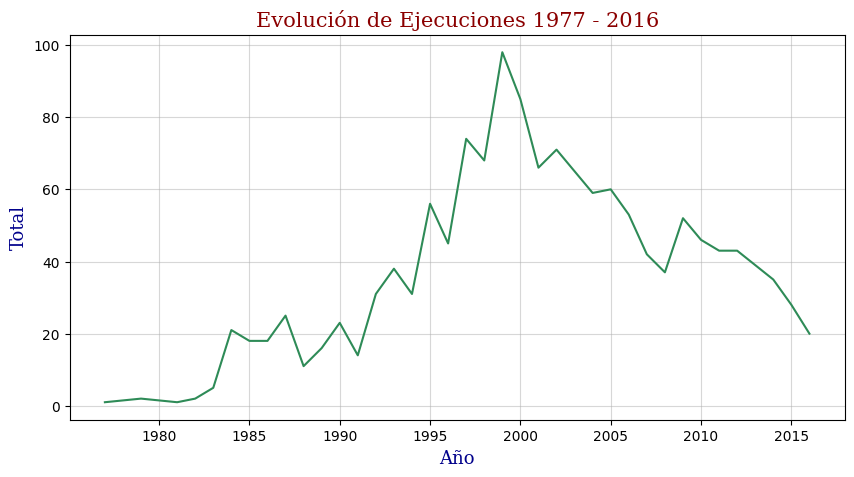

1999 fue el año con más ejecuciones: 98


In [51]:
# Pasamos a 'tiempo' los datos de la fecha
df['Date'] = pd.to_datetime(df['Date'])

# Primero obtenemos el año de cada fecha
df['Year'] = df['Date'].dt.year

ejaño = df['Year'].value_counts().sort_index() # Sort para ordenarlos
x = ejaño.index
y = ejaño.values

plt.figure(figsize=(10, 5))
plt.plot(x, y, color = 'seagreen')
plt.title('Evolución de Ejecuciones 1977 - 2016', fontdict = font1)
plt.xlabel("Año", fontdict = font2)
plt.ylabel("Total", fontdict = font2)
plt.grid(alpha = 0.5)

#plt.savefig('gráfica1.jpg', dpi=300, bbox_inches='tight') # Para guardar la imagen de la figura, el dpi es laresolución y tight para que no se corte el borde.
#files.download('gráfica1.jpg') # La descarga

plt.show()
print(ejaño.idxmax(), "fue el año con más ejecuciones:", ejaño.max()) # .idxmax regresa la etiqueda del valor del ejaño.max

## Gráfica: Evolución del método de Ejecución

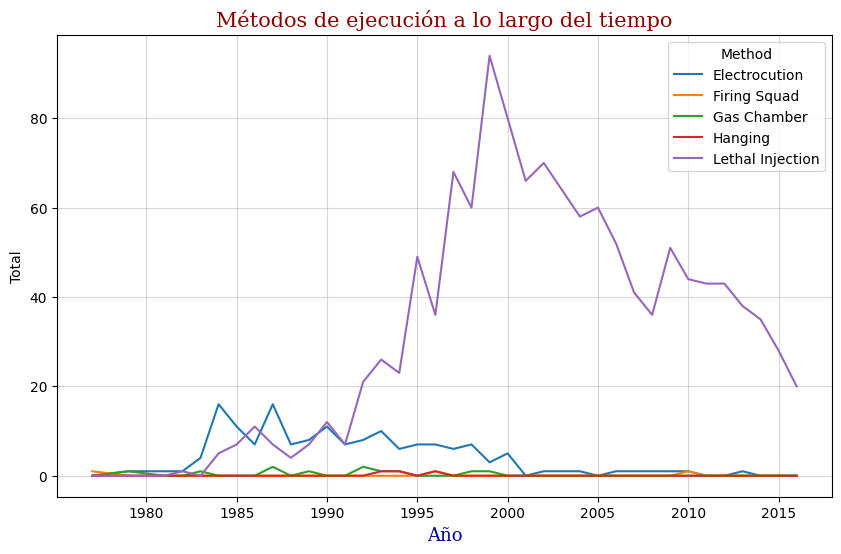

In [52]:

methodopa = df.groupby(["Year","Method"]).size().unstack(fill_value=0)
#df.groupby(["Year","Method"])  agrupa la informacion por año y metodo de ejecucion
#.size cuenta cuantas veces se hizo la ejecucion por cada tipo de metodo
#.unstack(fill_value=0) convierte los valores en columnas
#fill_value=0  Si hay un año sin cierta ejecución entonces coloca cero en lugar de vacío

methodopa.plot(figsize=(10,6))# generar la grafica
plt.title("Métodos de ejecución a lo largo del tiempo", fontdict = font1)
plt.xlabel("Año", fontdict = font2)
plt.ylabel("Total")#numero de ejecuciones
plt.grid(alpha = 0.5)

#plt.savefig('gráfica2.jpg', dpi=300, bbox_inches='tight') # Para guardar la imagen de la figura, el dpi es laresolución y tight para que no se corte el borde.
#files.download('gráfica2.jpg') # La descarga

plt.show()




## Gráfica: Promedio de Edad

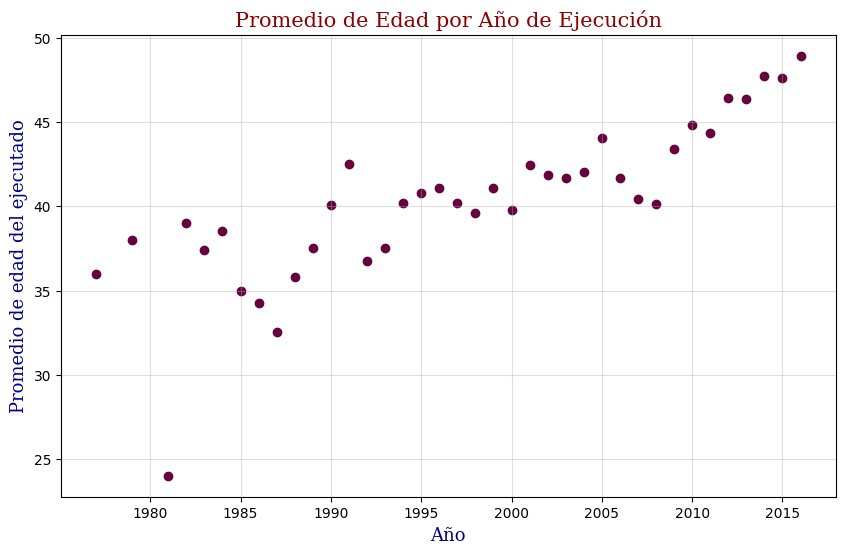

In [53]:
edadAño = df.groupby('Year')['Age'].mean()
color1 = ['#66023C']
plt.figure(figsize=(10, 6))
plt.title("Promedio de Edad por Año de Ejecución", fontdict = font1)
plt.xlabel("Año", fontdict = font2)
plt.ylabel("Promedio de edad del ejecutado", fontdict = font2)

plt.scatter(edadAño.index, edadAño.values, color = color1)

plt.grid(alpha = 0.4)

#plt.savefig('gráfica3.jpg', dpi=300, bbox_inches='tight') # Para guardar la imagen de la figura, el dpi es laresolución y tight para que no se corte el borde.
#files.download('gráfica3.jpg') # La descarga

plt.show()

# **Otras gráficas**

## Gráfica: Ejecuciones por Estado
Se realizará por estados.

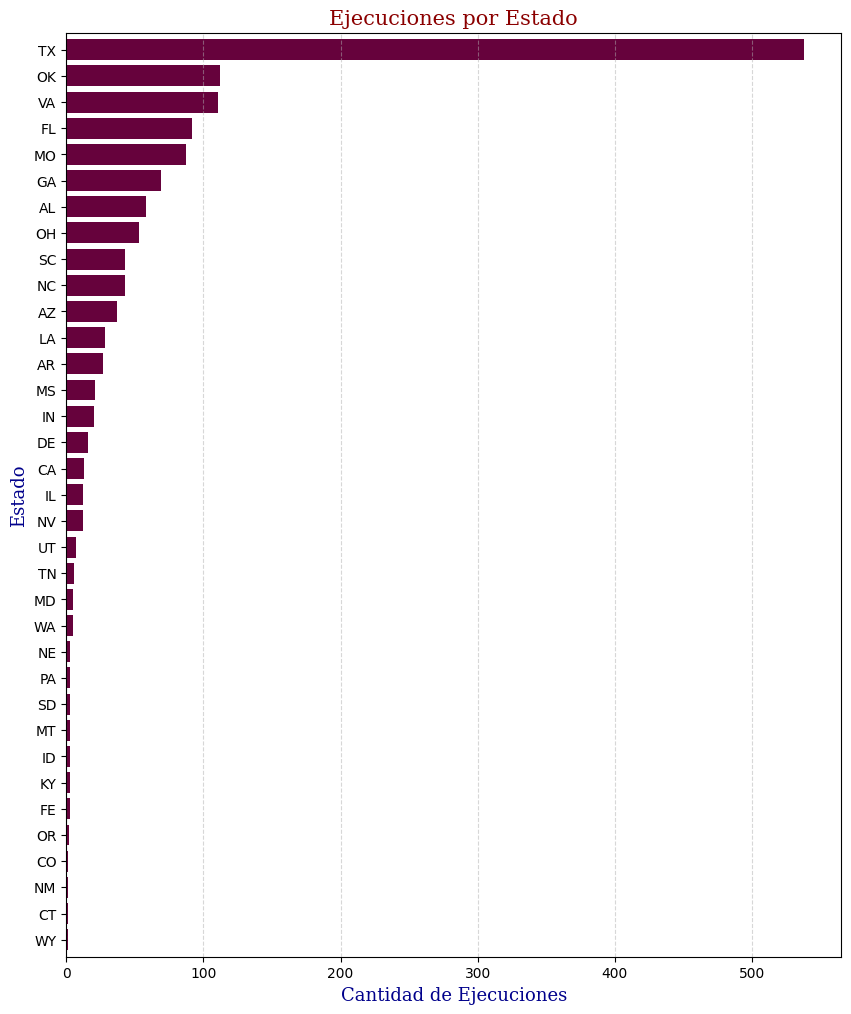

In [54]:
estados = df['State'].value_counts().sort_values(ascending=True) # value_counts para contar cuantas ejecuaciones y sort para ordenralos.

plt.figure(figsize=(10, 12))
estados.plot(kind='barh', color='#66023C', width=0.8)


plt.title('Ejecuciones por Estado', fontdict = font1)
plt.xlabel('Cantidad de Ejecuciones', fontdict = font2)
plt.ylabel('Estado',  fontdict = font2)

# Añadimos una cuadrícula vertical suave para medir mejor a ojo
plt.grid(axis='x', linestyle='--', alpha=0.5)

#plt.savefig('gráfica1.1jpg', dpi=300, bbox_inches='tight') # Para guardar la imagen de la figura, el dpi es laresolución y tight para que no se corte el borde.
#files.download('gráfica1.1jpg') # La descarga

plt.show()

# Aquí vemos que los dos estados con mayor ejecuciones son Texas y Oklahoma, en el análisis de los datos faltantes en la categoría de Victim Sex habían dos de TX y dos de OK, probablemente al ser estados que manejan
# muchas ejecuciones, es más fácil que suceda un error.

## Gráfica: Sesog Racial

<Figure size 1000x600 with 0 Axes>

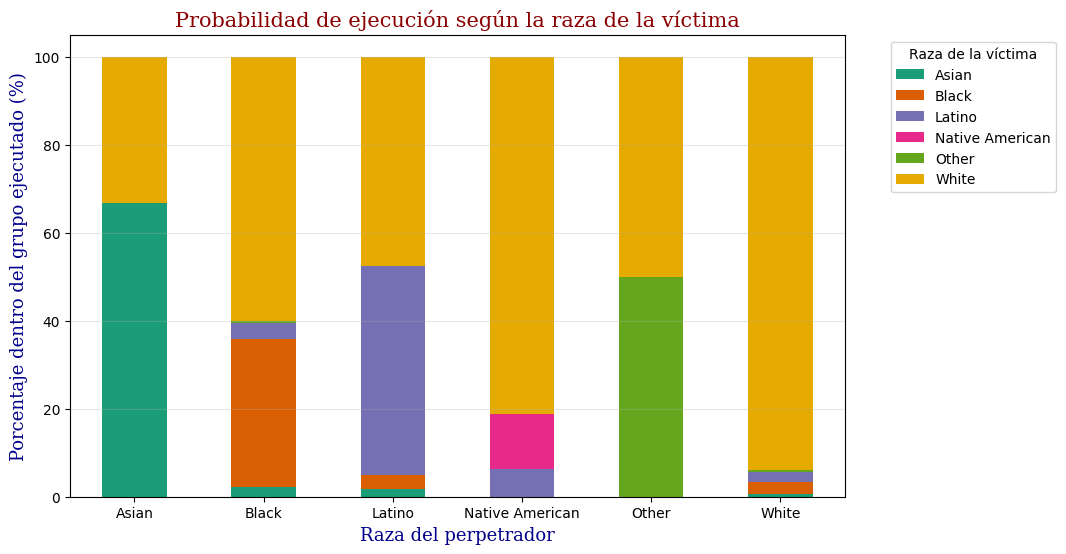

In [55]:
# Esta función busca la palabra clave y asigna una categoría general.
# esta funcion limpia la base de datos para una mejor imagen a la hora de graficar ya que cuando se grafica sin ella
# los datos de los colores se saturan
def simplraza(texto):
    texto = str(texto).lower()

    if 'white' in texto:
        return 'White'
    elif 'black' in texto:
        return 'Black'
    elif 'latino' in texto or 'hispanic' in texto: #selecciona una palabra clave y la filtra
        return 'Latino'
    elif 'asian' in texto:
        return 'Asian'
    elif 'native' in texto:
        return 'Native American'
    else:
        return 'Other'

df['Victim Race Grouped'] = df['Victim Race'].apply(simplraza) # Aplica la función para crear una columna

#  Crea la tabla con la nueva columna
# Usamos 'Victim Race Grouped' en lugar de la original
cruce_norm = pd.crosstab(df["Race"], df["Victim Race Grouped"], normalize="index") * 100

plt.figure(figsize=(10,6))

#Colores para la gráfica:
colores = {
    "Asian": "#1B9E77",
    "Black": "#D95F02",
    "Latino": "#7570B3",
    "Native American": "#E7298A",
    "Other": "#66A61E",
    "White": "#E6AB02"
}

cruce_norm.plot(kind="bar", stacked=True, color=[colores.get(x, '#333333') for x in cruce_norm.columns], figsize=(10,6)) # Grafica los datos

plt.title("Probabilidad de ejecución según la raza de la víctima", fontdict = font1) #titulo
plt.xlabel("Raza del perpetrador", fontdict = font2)#eje x
plt.ylabel("Porcentaje dentro del grupo ejecutado (%)", fontdict = font2)#eje y

plt.legend(title="Raza de la víctima", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0) #Para que las palabras del eje x no salgan en vertical
plt.grid(axis="y", alpha=0.3)

#plt.savefig('gráfica2.1.jpg', dpi=300, bbox_inches='tight') # Para guardar la imagen de la figura, el dpi es laresolución y tight para que no se corte el borde.
#files.download('gráfica2.1.jpg') # La descarga

plt.show()

## Gráfica: Renuncia a la apelación

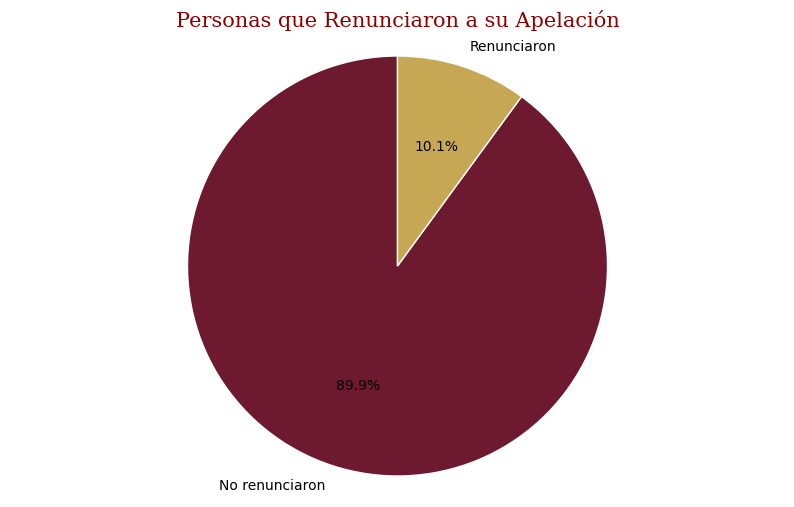

In [56]:
df['VolTV'] = df['Volunteer'].map({'Yes': True, 'No': False})
colores = ['#6D1930', '#C5A754']

porcentajeVol = df['VolTV'].value_counts(normalize=True) * 100
etiquetaPastel=["No renunciaron","Renunciaron"]

plt.figure(figsize=(10, 6))
plt.pie(porcentajeVol, labels=etiquetaPastel , colors = colores, autopct="%1.1f%%", startangle=90, wedgeprops={'edgecolor': 'white'}) # wedgedrops para el borde blanco
plt.title("Personas que Renunciaron a su Apelación", fontdict = font1)
plt.axis("equal")

#plt.savefig('gráfica3.1.jpg', dpi=300, bbox_inches='tight') # Para guardar la imagen de la figura, el dpi es laresolución y tight para que no se corte el borde.
#files.download('gráfica3.1.jpg') # La descarga

plt.show()